In [42]:
from rectpack import *
from rectpack import newPacker

#Added a buffer of 5cm for each container. All the given values are in centimetres
pallet1 = [(85,125)] #European Pallet
pallet2 = [(105,125)] #American Pallet
pallet11 = [85,125]
pallet22 = [105,125]
pallets = (pallet1)*12+(pallet2)*13
print(pallets)
bins = [(235, 590)]#20' and 40' standard containers
packer = newPacker(bin_algo=PackingBin.BFF,pack_algo=SkylineBl,sort_algo=SORT_SSIDE)

# Add the rectangles to packing queue
for i,r in enumerate(pallets):
	packer.add_rect(*r,rid=i)
# Add the containers where the pallets will be placed
for i, b, in enumerate(bins):
	packer.add_bin(*b,bid=i,count=float("inf"))
# Start packing
packer.pack()

[(85, 125), (85, 125), (85, 125), (85, 125), (85, 125), (85, 125), (85, 125), (85, 125), (85, 125), (85, 125), (85, 125), (85, 125), (105, 125), (105, 125), (105, 125), (105, 125), (105, 125), (105, 125), (105, 125), (105, 125), (105, 125), (105, 125), (105, 125), (105, 125), (105, 125)]


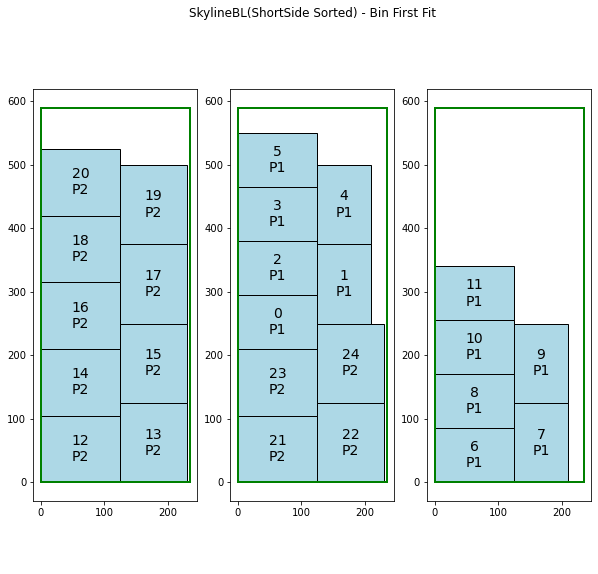

In [43]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import*
from rectpack import newPacker
from pandas import*
from numpy import*
%matplotlib inline

def draw_result(packer):
    #Screen size
    fig = plt.figure(figsize=(10,10))
    plt.box(False)
    plt.axis('off')
    plt.title('SkylineBL(ShortSide Sorted) - Bin First Fit')
    for i, abin in enumerate(packer,1):
        ax = fig.add_subplot(1, len(packer), i,aspect='equal')
        
        #Draw the container.
        ax.add_patch(Rectangle((0,0), abin.width, abin.height,fc="none", ec="g", lw=2, zorder=10))
        for r in abin:
            #Draw a box.
            ax.add_patch(Rectangle((r.x, r.y), r.width, r.height, fc="lightblue", ec="k"))
            cx, cy = r.x + r.width / 2, r.y + r.height / 2
            if r.width+r.height == 230:
                s = str(r.rid)+"\nP2"
            else:
                s = str(r.rid)+"\nP1"
            ax.text(cx, cy, s, ha ="center",va="center", color="k", fontsize=14)
            ax.relim()
            ax.autoscale_view()
draw_result(packer)
